<a href="https://colab.research.google.com/github/linailisry/Analisis_data_streamlit/blob/main/Linaili_Himmatus_Suroyya_Tugas_Praktek_BNSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BAGIAN 1**

In [ ]:
# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
import missingno as msno

# import visualisasi data
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["seaborn"])

<ipython-input-1-074e41039619>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use(["seaborn"])


In [ ]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Mengecek data duplikat
df.duplicated().sum()

0

<Axes: >

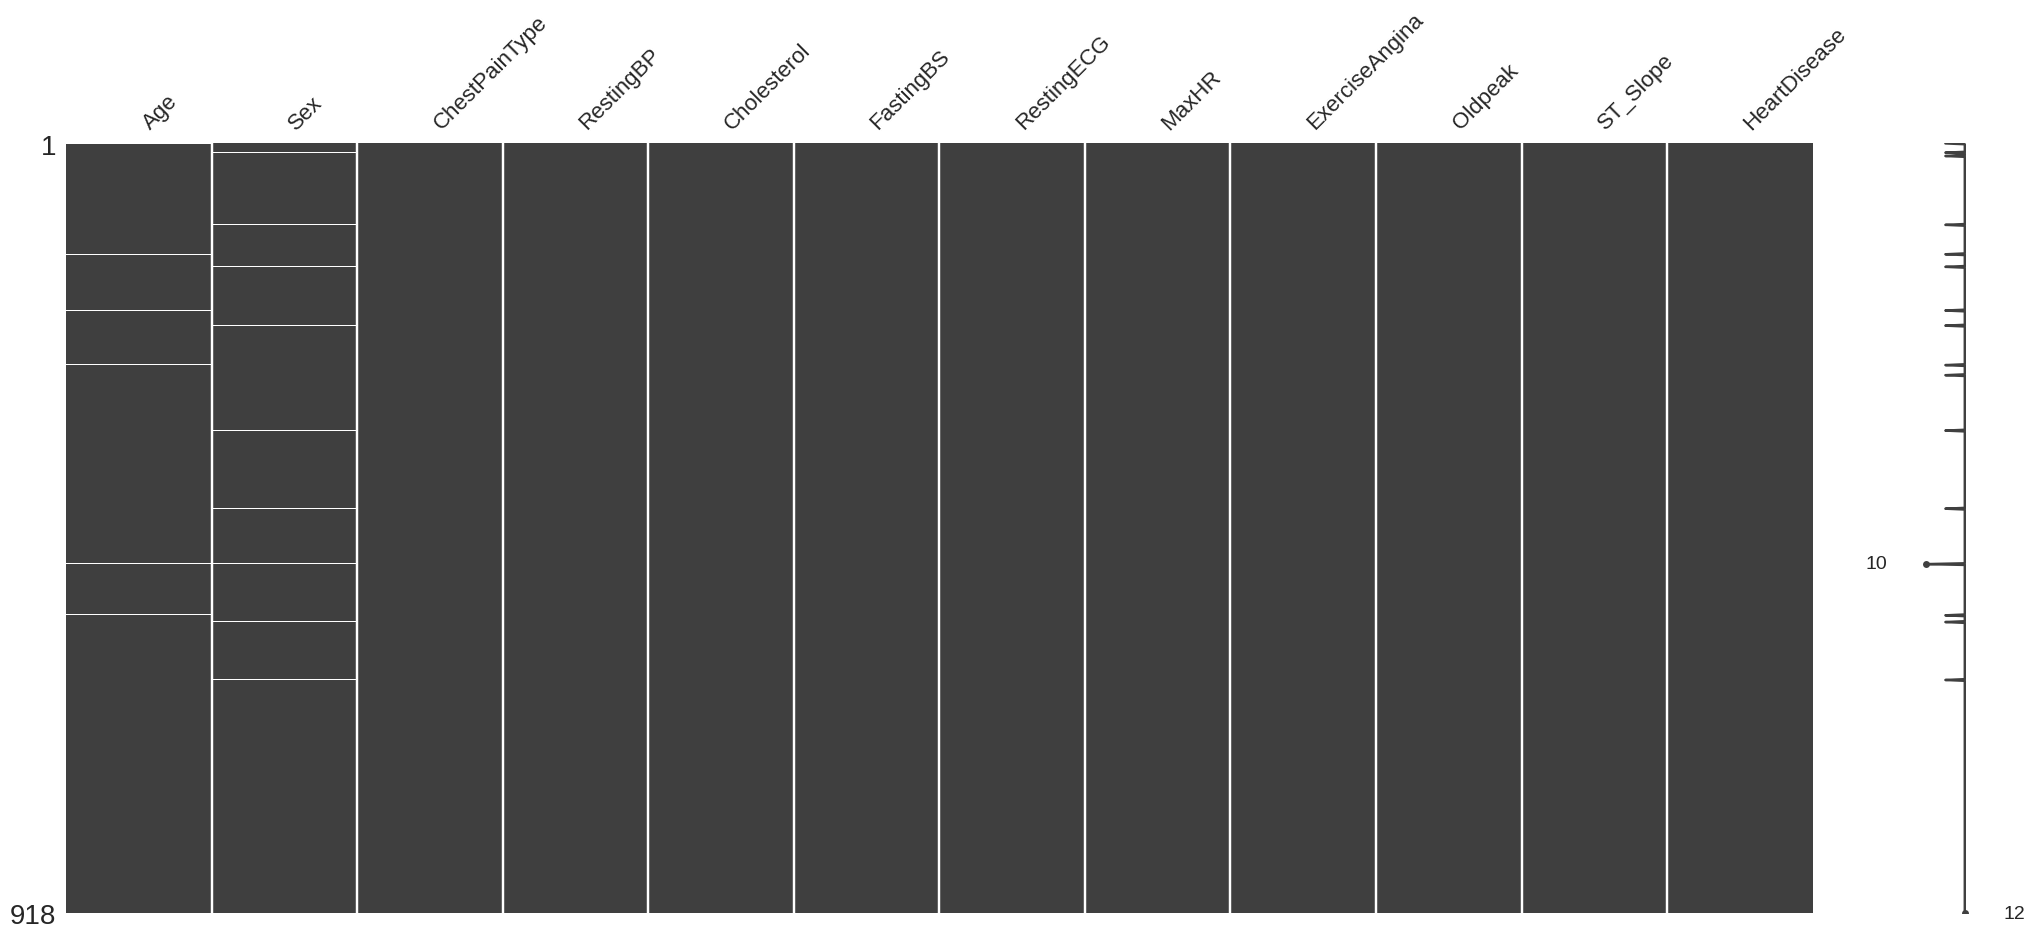

In [ ]:
# Visualisasi missing values dengan bantuan library missingno
msno.matrix(df)

In [ ]:
# Mengecek missing values
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
Sex,object,10,1.089325,2,M
Age,float64,7,0.762527,57,72.0
ChestPainType,object,0,0.000000,4,NAP
RestingBP,int64,0,0.000000,67,110
Cholesterol,int64,0,0.000000,222,247
FastingBS,int64,0,0.000000,2,0
RestingECG,object,0,0.000000,3,ST
MaxHR,int64,0,0.000000,119,145
ExerciseAngina,object,0,0.000000,2,Y
Oldpeak,float64,0,0.000000,53,-2.0


tidak ada data yang presentase missing valuesnya tinggi atau di atas 30% sehingga tidak perlu dilakukan drop kolom

In [ ]:
df.isna().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

**DATA CLEANING**

In [ ]:
# Pisahkan tipe datanya menjadi numerical dan categorical
num_cols = df.select_dtypes(include=['float', 'int']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")
print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")


Numerical Columns	(7)	: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical Columns	(5)	: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


missing value pada tiap data numerik akan diisi dengan mean, sedangkan untuk data kategorik akan diisi dengan modus

In [ ]:
# Missing values pada tipe data numerical akan difill dengan mean, sedangkan untuk tipe data categorical akan difill dengan modus.

print("Numerical Columns")
for i in num_cols:
    df[i] = df[i].fillna(df[i].mean())
    print(f"NaN values in {i} have been replaced by {round(df[i].mean(),3)}")

print("\nCategorical Columns")
for i in cat_cols:
    df[i] = df[i].fillna(df[i].mode().values[0])
    print(f"NaN values in {i} have been replaced by {df[i].mode().values[0]}")

Numerical Columns
NaN values in Age have been replaced by 54.102
NaN values in RestingBP have been replaced by 132.397
NaN values in Cholesterol have been replaced by 198.8
NaN values in FastingBS have been replaced by 0.233
NaN values in MaxHR have been replaced by 136.809
NaN values in Oldpeak have been replaced by 0.887
NaN values in HeartDisease have been replaced by 0.553

Categorical Columns
NaN values in Sex have been replaced by M
NaN values in ChestPainType have been replaced by ASY
NaN values in RestingECG have been replaced by Normal
NaN values in ExerciseAngina have been replaced by N
NaN values in ST_Slope have been replaced by Flat


In [ ]:
# Cek kembali missing valuesnya
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**REMOVING OUTLIER**

pendeteksian outlier dilakukan untuk mendapatkan hasil yang lebih akurat. Apabila ditemukan adanya outlier dapat dilakukan penghapusan.

In [ ]:
# Fungsi untuk Mendeteksi Outliers
def find_outlier(data):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)

    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)

    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)

    return outlier

In [ ]:
num_cols = df.select_dtypes(include=['float', 'int']).columns
print(num_cols)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


In [ ]:

# Mendeteksi Outliers
pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num_cols]]) / len(df) * 100
}).set_index(num_cols).sort_values("outliers",ascending=False)

,outliers,percentage
FastingBS,214,23.311547
Cholesterol,183,19.934641
RestingBP,28,3.050109
Oldpeak,16,1.742919
Age,7,0.762527
MaxHR,2,0.217865
HeartDisease,0,0.000000


berdasarkan hasil di atas, presentase outlier tidak lebih dari 30%, sehingga tidak perlu dilakukan drop kolom

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.102086,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.000000,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.000000,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.000000,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.000000,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.000000,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.000000,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.000000,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.000000,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**DATA PREPROCESSING**

In [ ]:
!pip install dython
from dython.nominal import associations


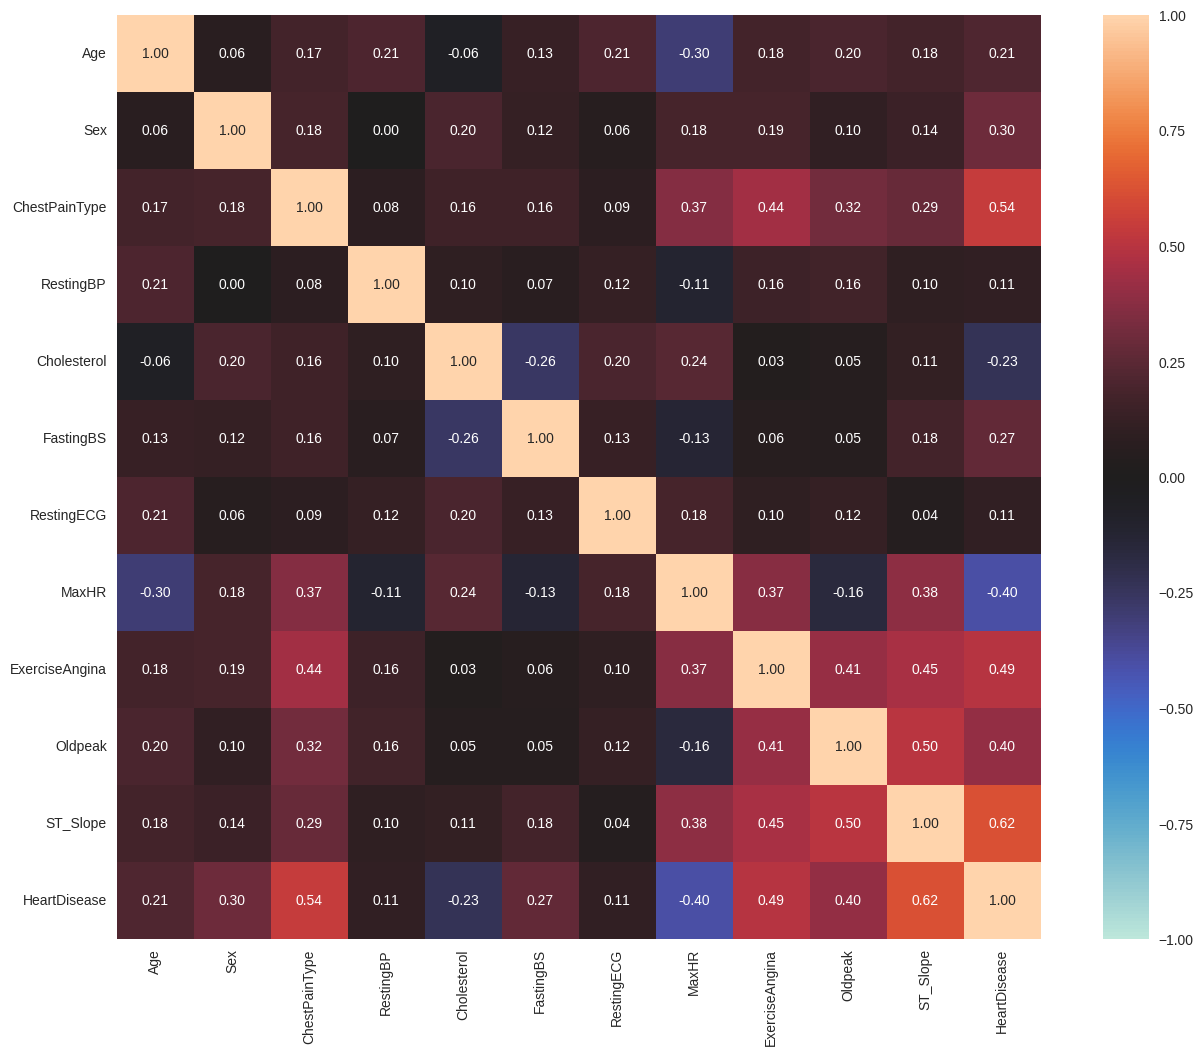

In [ ]:
corr = associations(df,figsize=(16,12))

Agar dapat lebih jelas dilihat columns (features) yang paling mempengaruhi HeartDisease, koefisien korelasinya akan diurutkan untuk kemudian didrop columns (features) yang tidak terlalu berpengaruh terhadap HeartDisease.

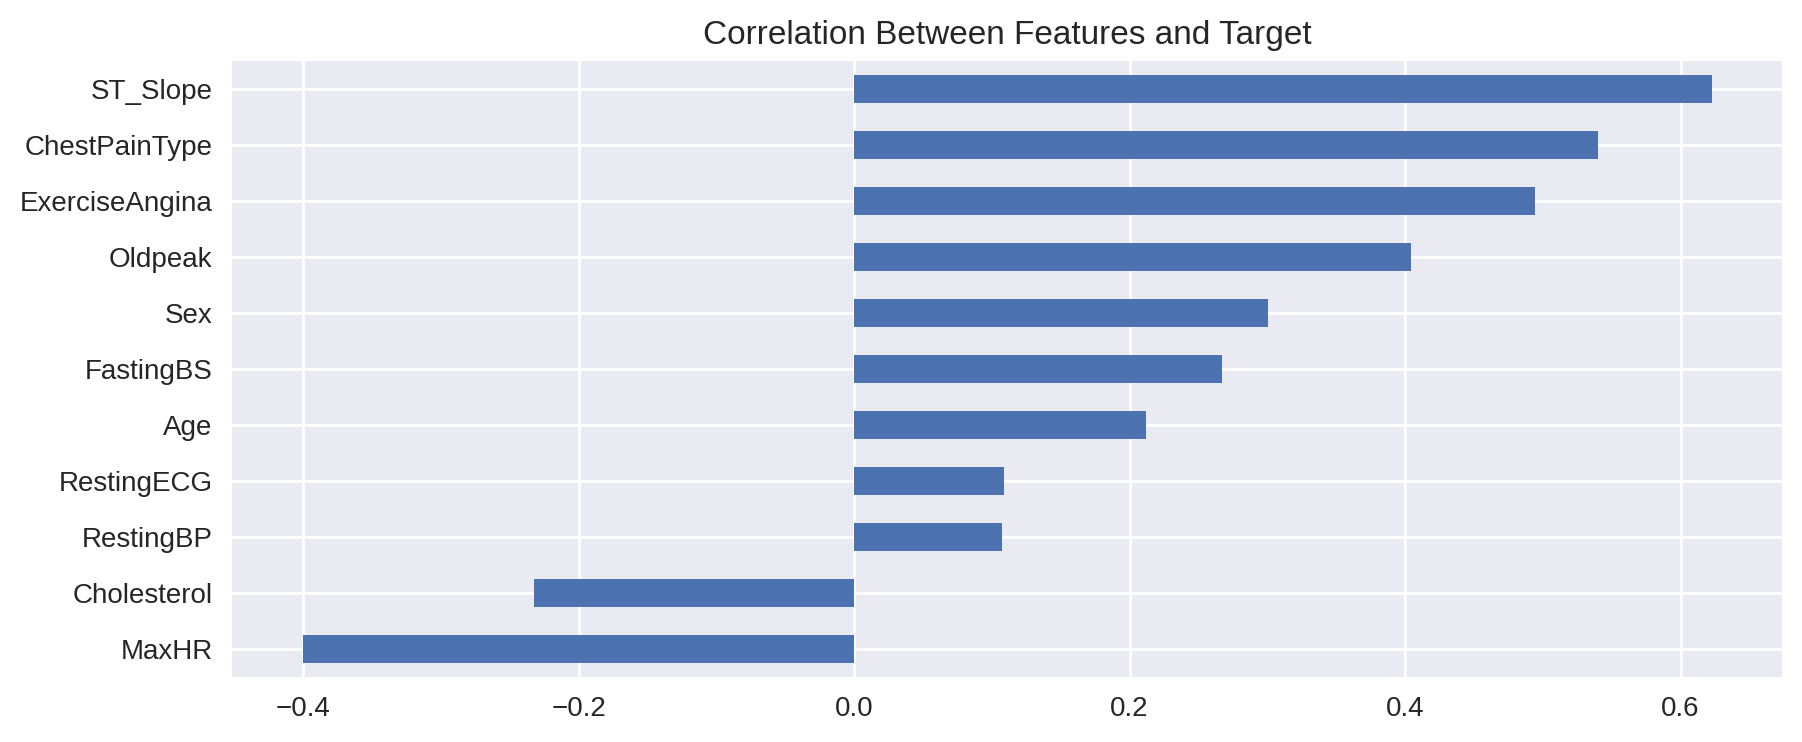

In [ ]:
fig = plt.figure(figsize=(10,4),dpi=200)
corr["corr"][["HeartDisease"]].iloc[:-1].sort_values("HeartDisease").plot(
    kind="barh",
    legend=None,
    title="Correlation Between Features and Target",
    ax=plt.gca()
)
plt.show()

terlihat bahwa MaxHR, Cholesterol, RestingECG, dan RestingBP berpengaruh kecil terhadap penyakit jantung, sehingga dapat dilakukan drop column.

In [ ]:
# Pisahkan kembali tipe datanya menjadi numerical dan categorical
num_cols = df.select_dtypes(include=['float', 'int']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")
print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")

Numerical Columns	(4)	: ['Age', 'FastingBS', 'Oldpeak', 'HeartDisease']
Categorical Columns	(4)	: ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']


In [ ]:
df = df.drop(corr["corr"][["HeartDisease"]].sort_values("HeartDisease").iloc[:4].index,axis=1)

In [ ]:
df

,Age,Sex,ChestPainType,FastingBS,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.102086,M,ATA,0,N,0.0,Up,0
1,49.000000,F,NAP,0,N,1.0,Flat,1
2,37.000000,M,ATA,0,N,0.0,Up,0
3,48.000000,F,ASY,0,Y,1.5,Flat,1
4,54.000000,M,NAP,0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...
913,45.000000,M,TA,0,N,1.2,Flat,1
914,68.000000,M,ASY,1,N,3.4,Flat,1
915,57.000000,M,ASY,0,Y,1.2,Flat,1
916,57.000000,F,ATA,0,N,0.0,Flat,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Karena pada independent variable terdapat data categorical, maka akan dilakukan LabelEncoder terlebih dahulu
df_categ = df[cat_cols]
for i in cat_cols:
    Lenc = LabelEncoder()
    df_categ[i] = Lenc.fit_transform(df_categ[i])
    df[i] = df_categ[i]

<ipython-input-22-7a1d6502c484>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categ[i] = Lenc.fit_transform(df_categ[i])
<ipython-input-22-7a1d6502c484>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categ[i] = Lenc.fit_transform(df_categ[i])
<ipython-input-22-7a1d6502c484>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df

,Age,Sex,ChestPainType,FastingBS,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.102086,1,1,0,0,0.0,2,0
1,49.000000,0,2,0,0,1.0,1,1
2,37.000000,1,1,0,0,0.0,2,0
3,48.000000,0,0,0,1,1.5,1,1
4,54.000000,1,2,0,0,0.0,2,0
...,...,...,...,...,...,...,...,...
913,45.000000,1,3,0,0,1.2,1,1
914,68.000000,1,0,1,0,3.4,1,1
915,57.000000,1,0,0,1,1.2,1,1
916,57.000000,0,1,0,0,0.0,1,1


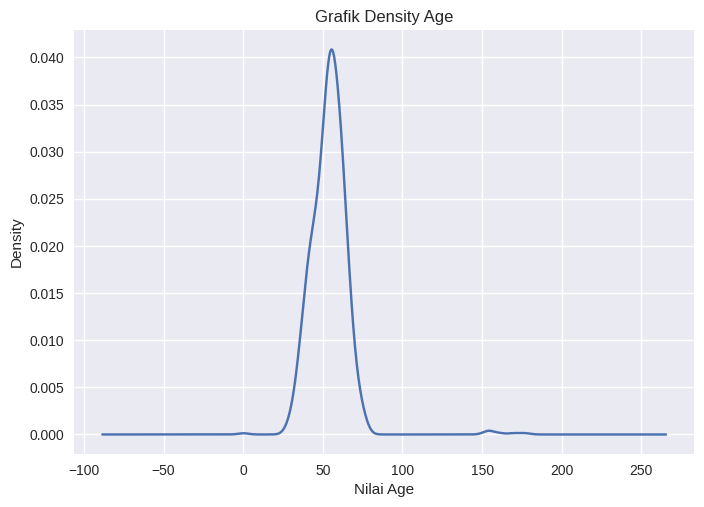

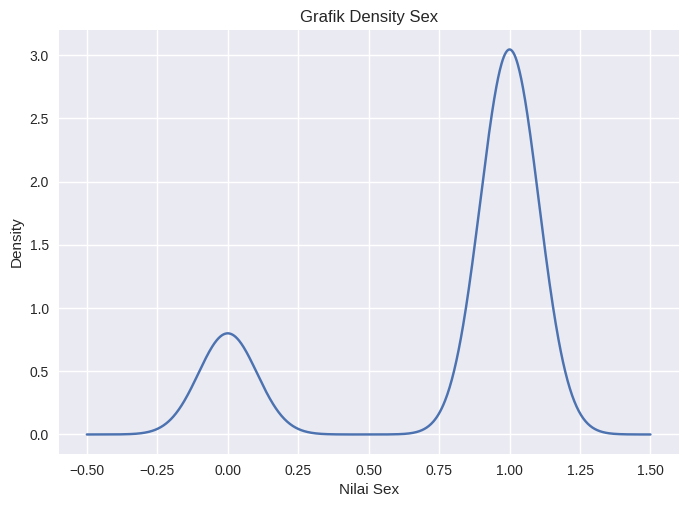

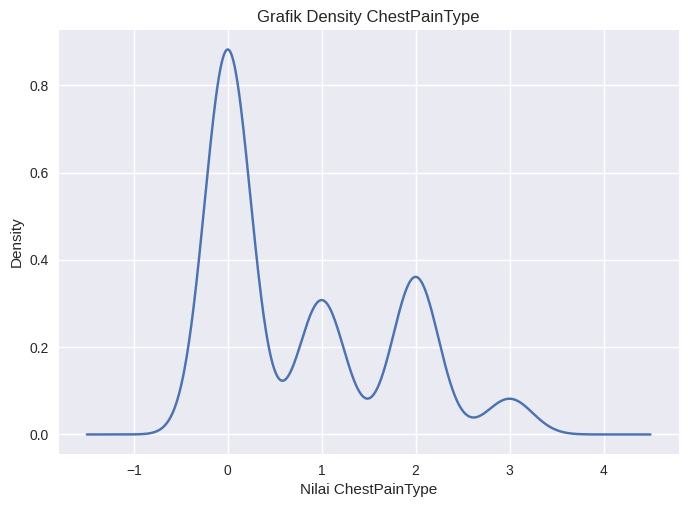

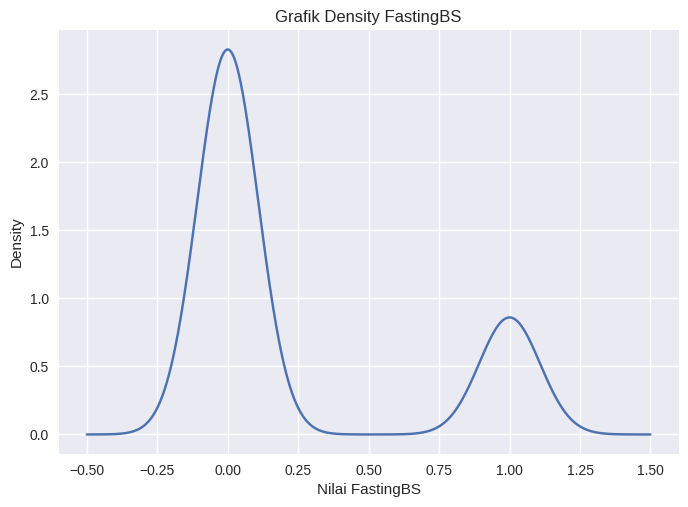

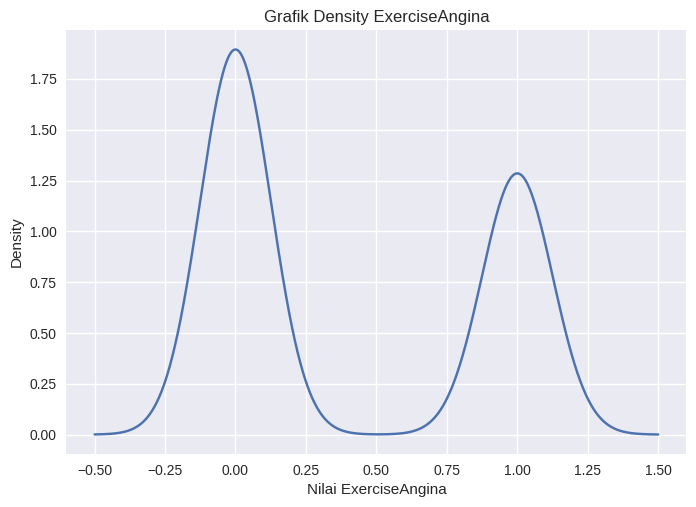

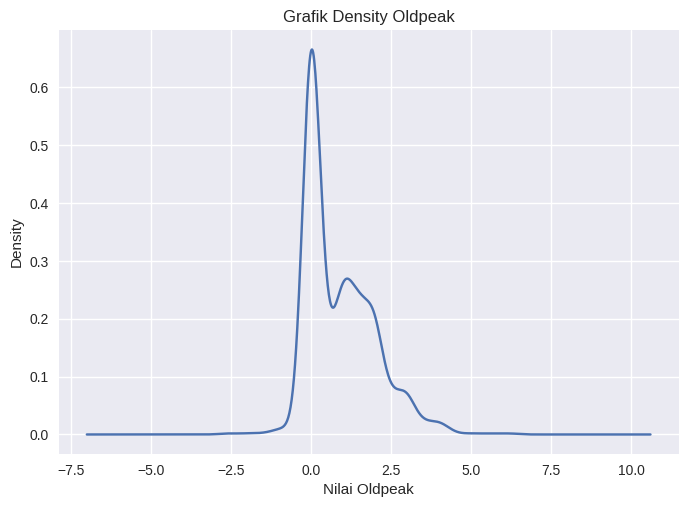

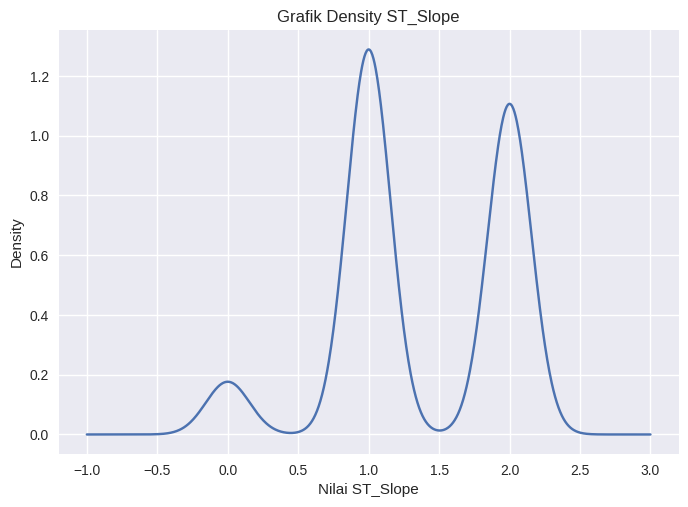

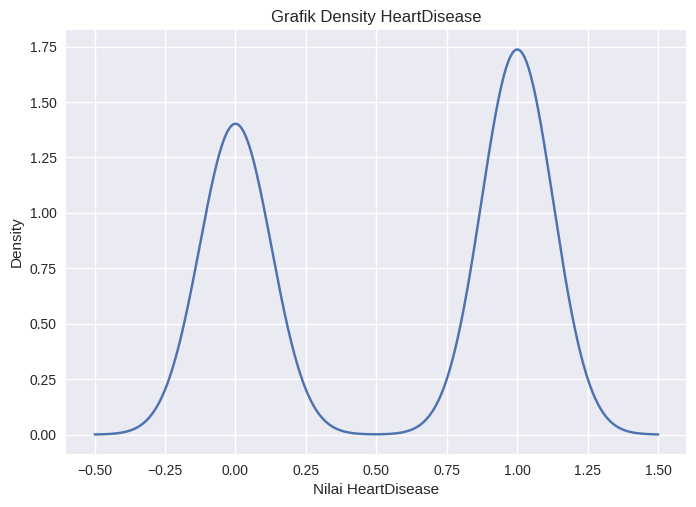

In [ ]:
# Menampilkan grafik density untuk setiap kolom
for column in df.columns:
    df[column].plot(kind='density')
    plt.xlabel(f'Nilai {column}')
    plt.title(f'Grafik Density {column}')
    plt.show()

**MODELLING**

In [ ]:
# Mendefinisikan variabel independent (X) dan variabel dependent (y)
X = df.drop("HeartDisease",axis=1)
y = df["HeartDisease"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataframe menjadi data training dan data testing dengan ratio 60:40
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

print(f"Training dataset\t: {len(X_train)} ({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)} ({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 550 (60%)
Testing dataset		: 368 (40%)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Karena setiap variabel independen memiliki scale yang berbeda, maka akan dilakukan standarisasi dengan StandardScaler()
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
#import library untuk modelling pada praktek ini menggunakan decision tree dan SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

**MODELLING TRAIN**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


**PERFORMANCE**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Decision Tree

In [ ]:
pd.DataFrame(confusion_matrix(y_test, dt.predict(X_test)), index = ['Actual 0', 'Actual 1'], columns = ['Predict 0', 'Predict 1'])

,Predict 0,Predict 1
Actual 0,114,33
Actual 1,64,157


In [ ]:
print("Accuracy = ", accuracy_score(y_test, dt.predict(X_test)))

Accuracy =  0.7364130434782609


In [ ]:
print("Precision = ", precision_score(y_test, dt.predict(X_test)))

Precision =  0.8263157894736842


In [ ]:
print("Recall = ", recall_score(y_test, dt.predict(X_test)))

Recall =  0.7104072398190046


In [ ]:
print("F1 Score = ", f1_score(y_test, dt.predict(X_test)))

F1 Score =  0.7639902676399027


In [ ]:
# Menghitung akurasi
dt_accuracy = accuracy_score(y_test, dt_pred)

# Membuat DataFrame untuk menampilkan hasil prediksi
result_df = pd.DataFrame({
    "prediction_HeartDisease_DT": dt_pred,
    "actual_HeartDisease": y_test,
    "accuracy_DT": [True if i == j else False for i, j in zip(y_test, dt_pred)]
}).reset_index(drop=True)

# Menampilkan hasil prediksi dan akurasi
print(result_df)
print(f"\nAkurasi Decision Tree: {dt_accuracy}")

     prediction_HeartDisease_DT  actual_HeartDisease  accuracy_DT
0                             0                    0         True
1                             0                    1        False
2                             1                    1         True
3                             0                    1        False
4                             0                    0         True
..                          ...                  ...          ...
363                           1                    0        False
364                           1                    1         True
365                           1                    1         True
366                           1                    1         True
367                           0                    0         True

[368 rows x 3 columns]

Akurasi Decision Tree: 0.7364130434782609


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, rf.predict(X_test)), index = ['Actual 0', 'Actual 1'], columns = ['Predict 0', 'Predict 1'])

,Predict 0,Predict 1
Actual 0,128,19
Actual 1,43,178


In [ ]:
print("Accuracy = ", accuracy_score(y_test, rf.predict(X_test)))

Accuracy =  0.8315217391304348


In [ ]:
print("Precision = ", precision_score(y_test, rf.predict(X_test)))

Precision =  0.9035532994923858


In [ ]:
print("Recall = ", recall_score(y_test, rf.predict(X_test)))

Recall =  0.8054298642533937


In [ ]:
print("F1 Score = ", f1_score(y_test, rf.predict(X_test)))

F1 Score =  0.8516746411483255


In [ ]:
# Pemodelan 1 Support Vector Machine (Menambahkan parameter class_weight="balanced" untuk mengatasi ketidakseimbangan prediksi)
svm2 = SVC(kernel='rbf',class_weight="balanced",random_state=42)

Bisa dilihat bahwa performance random forest secara umum lebih baik dibandingkan decision tree. Dari hasil recall random forest lebih baik dari Decision tree. Dimana pada Decision Tree  lebih banyak memprediksi orang yang actual nya terkena penyakit jantung, tapi diprediksi sehat.
Dalam kasus memprediksi penyakit, error seperti itu lebih penting untuk diminimalisir dibandingkan orang yang actual nya sehat tapi diprediksi sakit jantung.
